# Módulo de estatística 

## Projeto A - Análise do dataset "Wine Quality"

### Instruções

- O projeto deverá ser entregue até dia 22/11 antes do início da aula
- O projeto poderá ser feito em grupo com até 4 integrantes
- Serão 2 projetos A e B porém apenas 1 projeto deverá ser entregue e escolhido pelo grupo

- A entrega deve ser feita em jupyter notebook com os códigos explícitos e comentados. Além disso os conceitos, decisões e conclusões usadas devem estar destacadas no notebook

### Informações sobre o projeto

Dataset (conjunto de dados a ser utilizado) está disponível em:
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

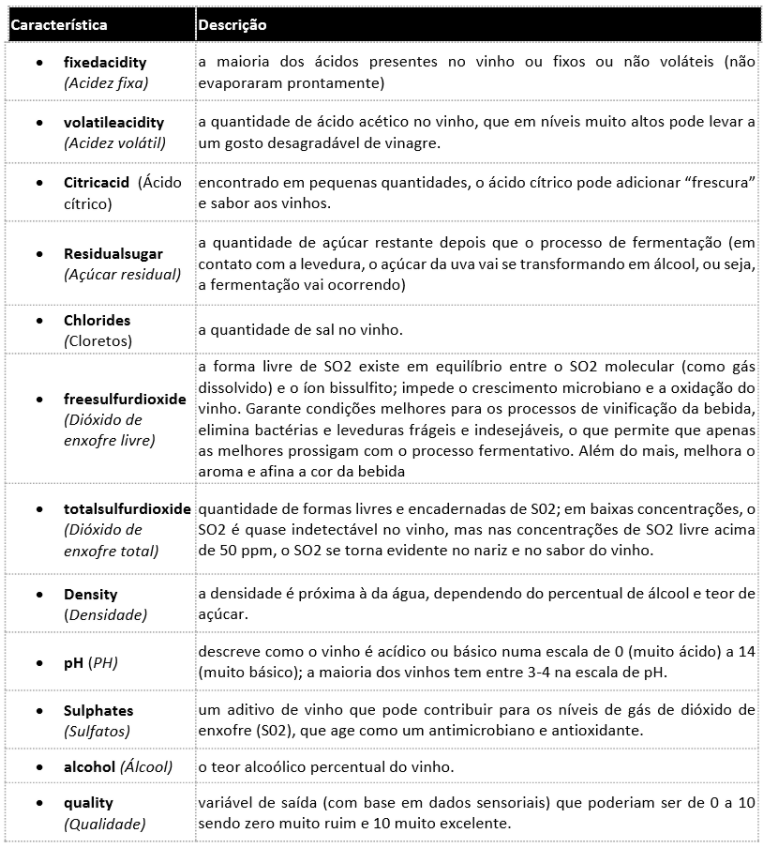

### Etapa 1

**EDA - Análise exploratória de dados**

- Análise das medidas de medidas de posição, dispersão, correlação (análises univaridas e bivariadas) - histograma, boxplot, mapa de calor, etc...
- Exclusão de outliers, caso necessário (sempre explicando a opção)



### Etapa 2

**Regressão Linear**

- Faça um algoritmo que estime a variável “Quality” em função das características físico-químicas dos vinhos
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

### Etapa 3

**Regressão logística**

- Sabendo que os vinhos com notas >= 6 são considerados vinhos de boa qualidade faça um algoritmo que classifique os vinhos em “Bom” ou “Ruim” em função de suas características físico-químicas;
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

In [1]:
# importando classes necessarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import pylab 
from sklearn.metrics import r2_score

In [2]:
# atribuindo os dataframes
df_vinho_red = pd.read_csv('winequality-red.csv',delimiter=';' )
df_vinho_white = pd.read_csv('winequality-white.csv', delimiter = ';')

In [3]:
# verificando informações dos datasets

# data set wine red 
display(df_vinho_red.head())
display(df_vinho_red.info())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

In [4]:
# data set white red
display(df_vinho_white.head())
display(df_vinho_white.info())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


None

#### Os datasets estão completos, ou seja, não possuem linhas sem dados.

In [5]:
# considerei trabalhar com os dataframes juntos
dataset = [df_vinho_red, df_vinho_white]
df_vinho = df_resultado = pd.concat(dataset)
df_vinho

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Medidas de posição

In [6]:
# loop com as medidas de dispersão de cada atributo do vinho

for x in df_vinho.columns:
    print('\033[1m Medidas de posição',x, '\033[0m')
    print('Média :', round(df_vinho[x].mean(),4))
    print('Moda:', round(df_vinho[x].mode()[0],4))
    print('Quartil 25%:', df_vinho[x].quantile(0.25))
    print('Mediana:', df_vinho[x].quantile(0.5))
    print('Quartil 75%:', df_vinho[x].quantile(0.75))
    

 Medidas de posição fixed acidity 
Média : 7.2153
Moda: 6.8
Quartil 25%: 6.4
Mediana: 7.0
Quartil 75%: 7.7
 Medidas de posição volatile acidity 
Média : 0.3397
Moda: 0.28
Quartil 25%: 0.23
Mediana: 0.29
Quartil 75%: 0.4
 Medidas de posição citric acid 
Média : 0.3186
Moda: 0.3
Quartil 25%: 0.25
Mediana: 0.31
Quartil 75%: 0.39
 Medidas de posição residual sugar 
Média : 5.4432
Moda: 2.0
Quartil 25%: 1.8
Mediana: 3.0
Quartil 75%: 8.1
 Medidas de posição chlorides 
Média : 0.056
Moda: 0.044
Quartil 25%: 0.038
Mediana: 0.047
Quartil 75%: 0.065
 Medidas de posição free sulfur dioxide 
Média : 30.5253
Moda: 29.0
Quartil 25%: 17.0
Mediana: 29.0
Quartil 75%: 41.0
 Medidas de posição total sulfur dioxide 
Média : 115.7446
Moda: 111.0
Quartil 25%: 77.0
Mediana: 118.0
Quartil 75%: 156.0
 Medidas de posição density 
Média : 0.9947
Moda: 0.9972
Quartil 25%: 0.99234
Mediana: 0.99489
Quartil 75%: 0.99699
 Medidas de posição pH 
Média : 3.2185
Moda: 3.16
Quartil 25%: 3.11
Mediana: 3.21
Quartil 75%: 3.

## Gráfico das medidas de posição

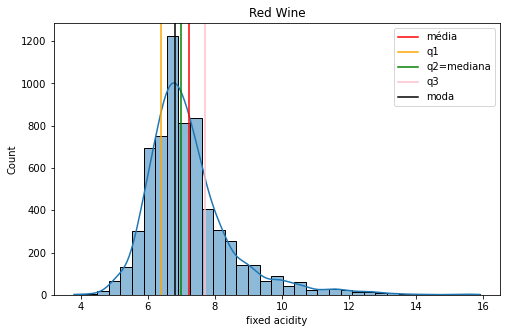

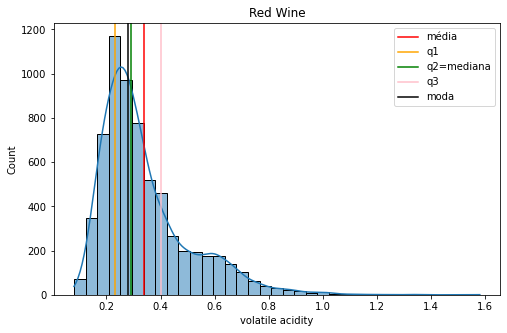

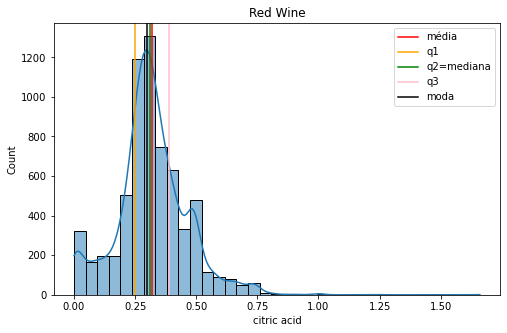

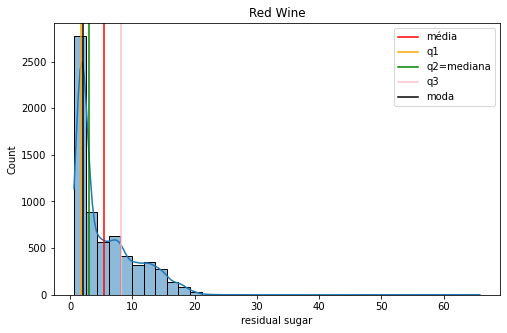

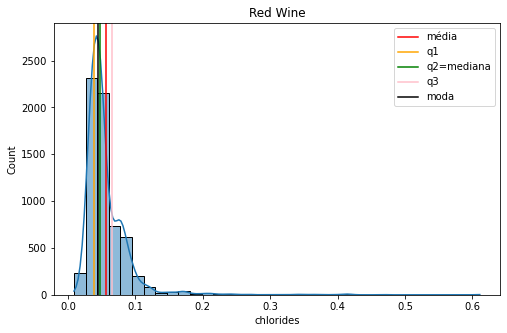

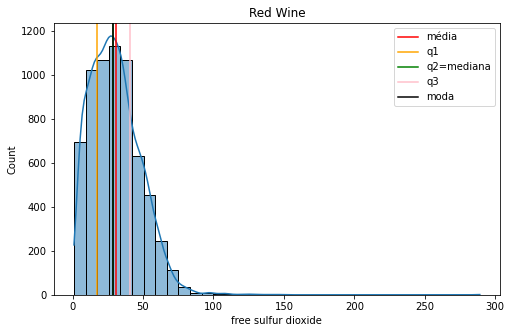

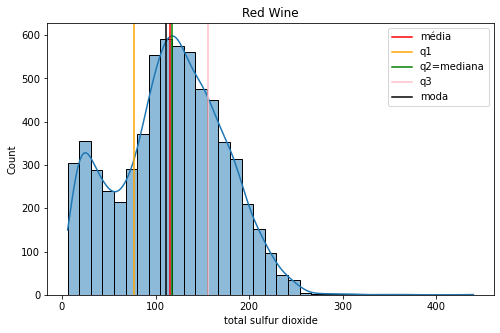

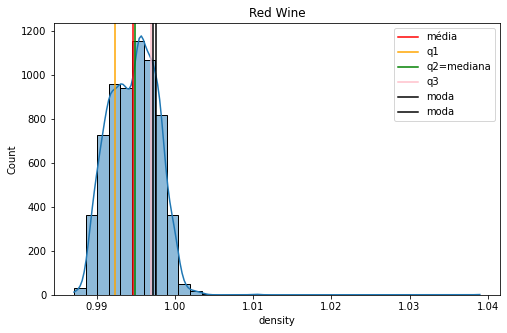

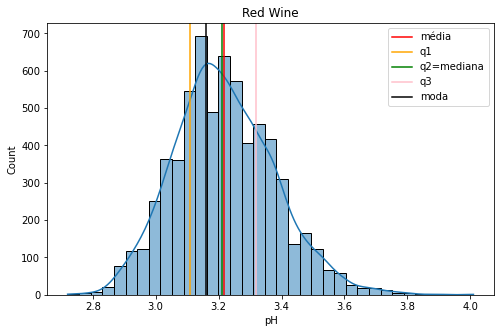

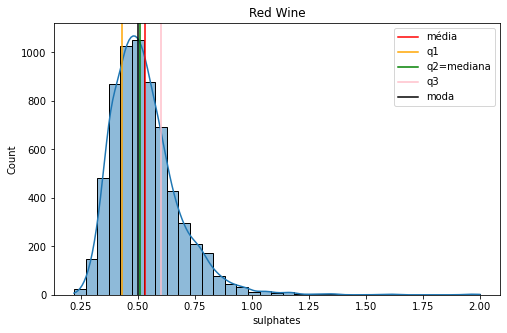

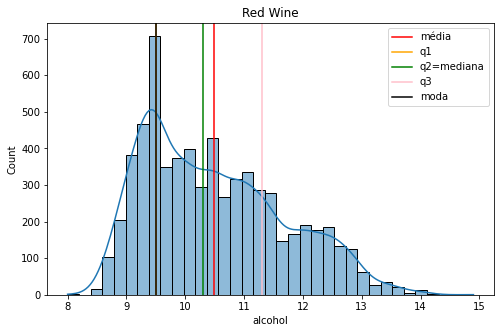

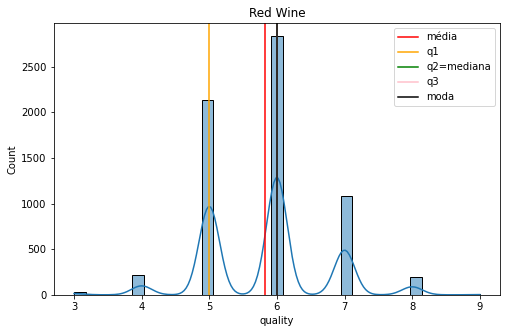

In [7]:
# plotando as medidas dos vinhos

# loop plotando cada medida dos atributos Red Wine
for x in df_vinho.columns:
    
    # tamanho grafico
    plt.subplots(figsize=(8,5))
    
    
        # grafico 
    sns.histplot(df_vinho[x], kde = True, bins = 35, alpha = 0.5 )
    plt.title('Red Wine')
    
    # plotando medidas
    plt.axvline(df_vinho[x].mean(), color="red", label="média")
    plt.axvline(df_vinho[x].quantile(0.25), color="orange", label="q1")
    plt.axvline(df_vinho[x].quantile(0.5), color="green", label="q2=mediana")
    plt.axvline(df_vinho[x].quantile(0.75), color="pink", label="q3")
    
    # loop para a moda
    for moda in range(df_vinho[x].mode().shape[0]):
        plt.axvline(df_vinho[x].mode()[moda], color="black", label="moda")
    plt.legend()
        

# Medidas de dispersão

 Medidas de dispersão 
Mínimo fixed acidity : 3.8
Máximo fixed acidity : 15.9
Amplitude fixed acidity : 12.100000000000001
Variância fixed acidity : 1.6807
Desvio padrão fixed acidity : 1.2964
Assimetria fixed acidity : 1.7233
IQR fixed acidity 1.3 



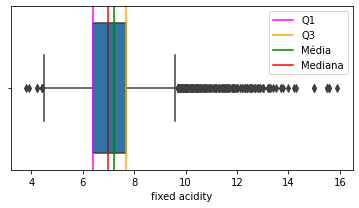

-----------------------------------------------------------------------------
Mínimo volatile acidity : 0.08
Máximo volatile acidity : 1.58
Amplitude volatile acidity : 1.5
Variância volatile acidity : 0.0271
Desvio padrão volatile acidity : 0.1646
Assimetria volatile acidity : 1.4951
IQR volatile acidity 0.17 



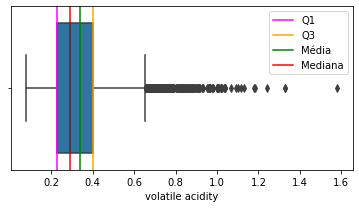

-----------------------------------------------------------------------------
Mínimo citric acid : 0.0
Máximo citric acid : 1.66
Amplitude citric acid : 1.66
Variância citric acid : 0.0211
Desvio padrão citric acid : 0.1453
Assimetria citric acid : 0.4717
IQR citric acid 0.14 



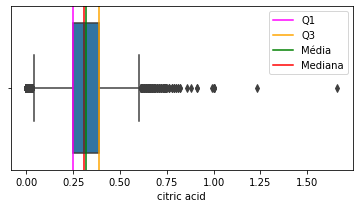

-----------------------------------------------------------------------------
Mínimo residual sugar : 0.6
Máximo residual sugar : 65.8
Amplitude residual sugar : 65.2
Variância residual sugar : 22.6367
Desvio padrão residual sugar : 4.7578
Assimetria residual sugar : 1.4354
IQR residual sugar 6.3 



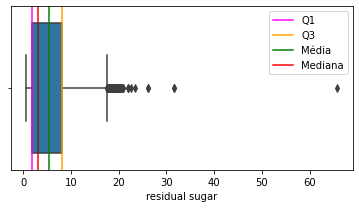

-----------------------------------------------------------------------------
Mínimo chlorides : 0.009
Máximo chlorides : 0.611
Amplitude chlorides : 0.602
Variância chlorides : 0.0012
Desvio padrão chlorides : 0.035
Assimetria chlorides : 5.3998
IQR chlorides 0.027 



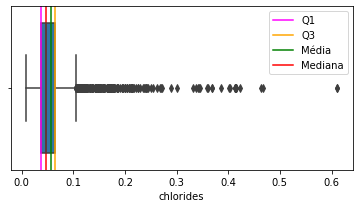

-----------------------------------------------------------------------------
Mínimo free sulfur dioxide : 1.0
Máximo free sulfur dioxide : 289.0
Amplitude free sulfur dioxide : 288.0
Variância free sulfur dioxide : 315.0412
Desvio padrão free sulfur dioxide : 17.7494
Assimetria free sulfur dioxide : 1.2201
IQR free sulfur dioxide 24.0 



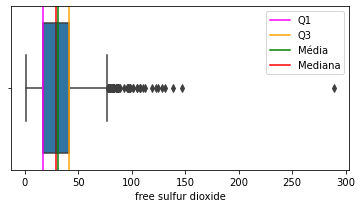

-----------------------------------------------------------------------------
Mínimo total sulfur dioxide : 6.0
Máximo total sulfur dioxide : 440.0
Amplitude total sulfur dioxide : 434.0
Variância total sulfur dioxide : 3194.72
Desvio padrão total sulfur dioxide : 56.5219
Assimetria total sulfur dioxide : -0.0012
IQR total sulfur dioxide 79.0 



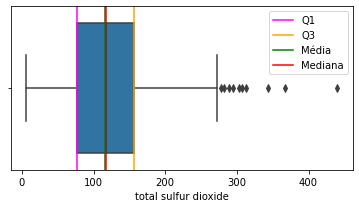

-----------------------------------------------------------------------------
Mínimo density : 0.98711
Máximo density : 1.03898
Amplitude density : 0.05186999999999997
Variância density : 0.0
Desvio padrão density : 0.003
Assimetria density : 0.5036
IQR density 0.0047 



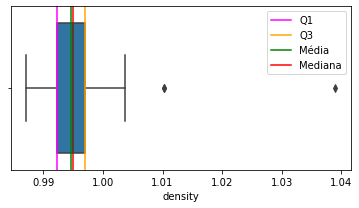

-----------------------------------------------------------------------------
Mínimo pH : 2.72
Máximo pH : 4.01
Amplitude pH : 1.2899999999999996
Variância pH : 0.0259
Desvio padrão pH : 0.1608
Assimetria pH : 0.3868
IQR pH 0.21 



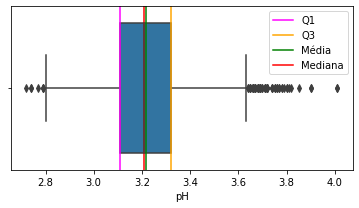

-----------------------------------------------------------------------------
Mínimo sulphates : 0.22
Máximo sulphates : 2.0
Amplitude sulphates : 1.78
Variância sulphates : 0.0221
Desvio padrão sulphates : 0.1488
Assimetria sulphates : 1.7973
IQR sulphates 0.17 



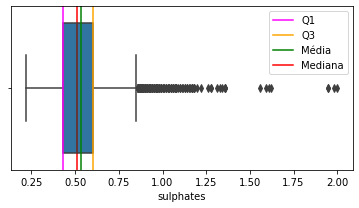

-----------------------------------------------------------------------------
Mínimo alcohol : 8.0
Máximo alcohol : 14.9
Amplitude alcohol : 6.9
Variância alcohol : 1.4226
Desvio padrão alcohol : 1.1927
Assimetria alcohol : 0.5657
IQR alcohol 1.8 



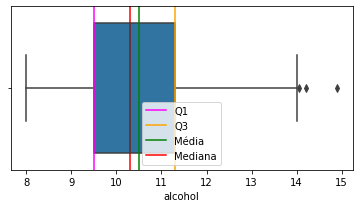

-----------------------------------------------------------------------------
Mínimo quality : 3
Máximo quality : 9
Amplitude quality : 6
Variância quality : 0.7626
Desvio padrão quality : 0.8733
Assimetria quality : 0.1896
IQR quality 1.0 



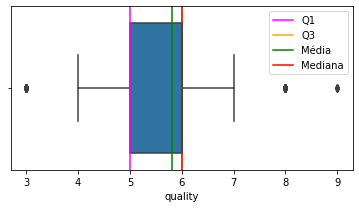

-----------------------------------------------------------------------------


In [8]:
print('\033[1m Medidas de dispersão \033[0m')

for x in df_vinho.columns:
    
    plt.subplots(figsize=(10,3))

    print('Mínimo', x, ':', df_vinho[x].min())
    print('Máximo', x, ':', df_vinho[x].max())
    print('Amplitude', x, ':', df_vinho[x].max() - df_vinho[x].min())
    print('Variância', x, ':', round(df_vinho[x].var(),4))
    print('Desvio padrão', x, ':', round(df_vinho[x].std(),4))
    print('Assimetria', x, ':', round(df_vinho[x].skew(),4))
    print('IQR',x,round(df_vinho[x].quantile(0.75) - df_vinho[x].quantile(0.25),4), '\n')
    
    # Boxplot
    plt.subplot(122)
    sns.boxplot(data = df_vinho, x=x)
    plt.axvline(df_vinho[x].quantile(0.25), color="magenta", label="Q1")
    plt.axvline(df_vinho[x].quantile(0.75), color="orange", label="Q3")
    plt.axvline(df_vinho[x].mean(), color="green", label="Média")
    plt.axvline(df_vinho[x].median(), color="red", label="Mediana")
    plt.tight_layout()
    plt.legend()
    plt.show();
    print('-----------------------------------------------------------------------------')

As variaveis apresentam muitos outliers, vamos tratar em seguida, mas analisaremos, também, se impactam sobre os modelos.

### Removendo Outliers

In [9]:
# calculando IQR para remover os outliers e criando função
def calc_outliers(df_valores):
    fator = 1.5
    # atribuindo os os quartis
    q1 = df_valores.quantile(q = 0.25)
    q3 = df_valores.quantile(q = 0.75)
    iqr = q3 - q1
    # valor inferior para separar o outliers
    inferior = q1 - (iqr * fator)
    # valor superior para separar o outliers
    superior = q3 + (iqr * fator)
    
    # returna os valores inferior e superior
    return inferior, superior

In [10]:
# separando as colunas e retirando a 'quality' (variavel resposta)
colunas = list(df_vinho.columns)
colunas.remove('quality')

In [11]:
# criando um copia do DF original para remover os outliers
# para verificar posteriormente com qual DF o modelo tera melhores resultados
df_vinho_sem_out = df_vinho.copy()
df_vinho_sem_out.shape

(6497, 12)

In [12]:
# loop para retirar os outliers atraves da função
for x in colunas:
    
    # valores inferior e superior da feature atraves da função
    inferior , superior = calc_outliers(df_vinho[x])
    
    # DF onde a cada loop remove os outliers de cada coluna
    df_vinho_sem_out = df_vinho_sem_out[(df_vinho_sem_out[x] > inferior) & (df_vinho_sem_out[x] < superior)]
    

In [13]:
df_vinho_sem_out.shape

(5018, 12)

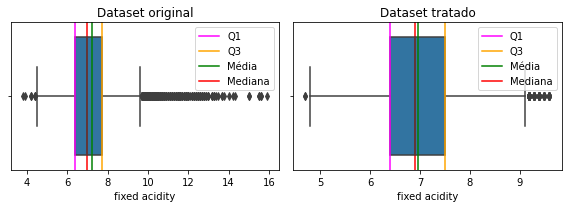

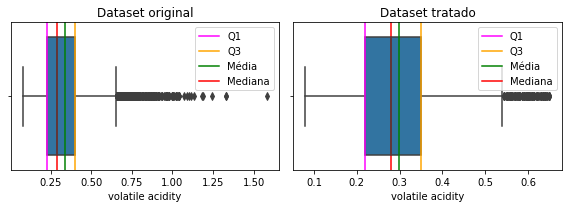

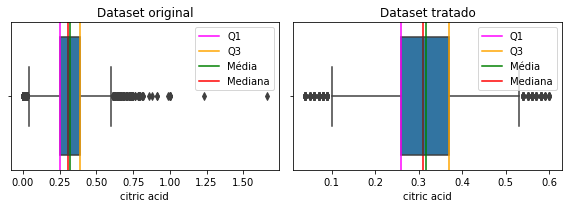

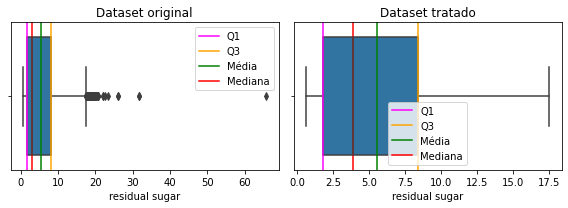

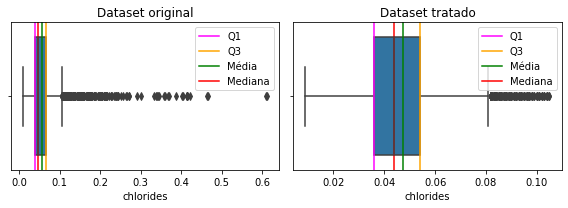

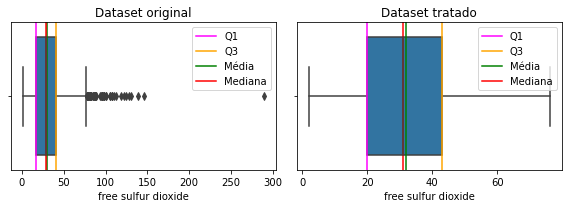

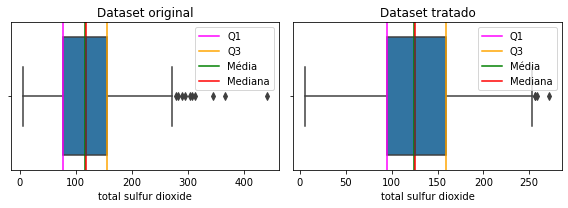

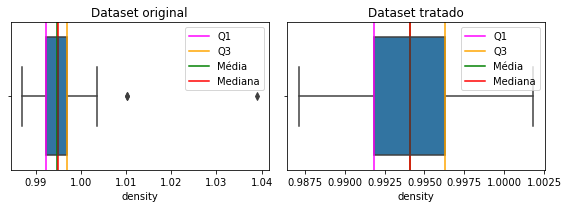

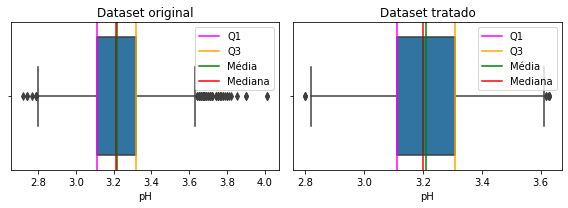

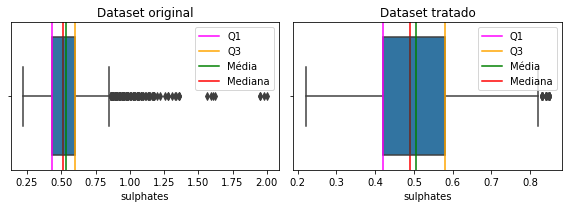

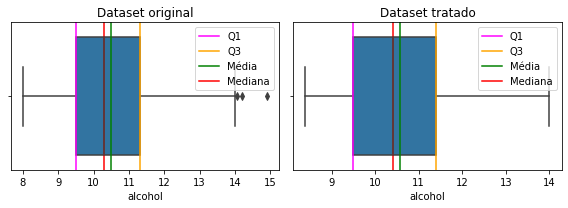

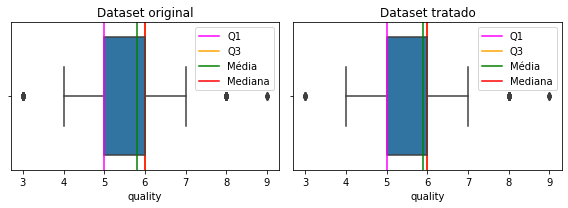

In [14]:
# loop para comparar o DF original e o tratado removido outliers
for x in df_vinho_sem_out:
    
    plt.subplots(figsize=(8,3))
    
    
    plt.subplot(121)
    
    # boxplot DF original
    sns.boxplot(data = df_vinho, x=x)
    plt.axvline(df_vinho[x].quantile(0.25), color="magenta", label="Q1")
    plt.axvline(df_vinho[x].quantile(0.75), color="orange", label="Q3")
    plt.axvline(df_vinho[x].mean(), color="green", label="Média")
    plt.axvline(df_vinho[x].median(), color="red", label="Mediana")
    plt.tight_layout()
    plt.title('Dataset original')
    plt.legend()

    # boxplot DF tratado
    plt.subplot(122)
    sns.boxplot(data = df_vinho_sem_out, x=x)
    plt.axvline(df_vinho_sem_out[x].quantile(0.25), color="magenta", label="Q1")
    plt.axvline(df_vinho_sem_out[x].quantile(0.75), color="orange", label="Q3")
    plt.axvline(df_vinho_sem_out[x].mean(), color="green", label="Média")
    plt.axvline(df_vinho_sem_out[x].median(), color="red", label="Mediana")
    plt.tight_layout()
    plt.title('Dataset tratado')
    plt.legend()
    plt.show();

O df tratado ainda apresenta outliers, principalmente 'volatile acidity' e 'chlorides' que demonstra que os dados estão bem dispersos. Talvez, observado posteriormente, seja o motivo dos dados tratados não terem resultados muito diferentes para o df original

# Correlação

In [15]:
#Correlação Spearman
df_vinho.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


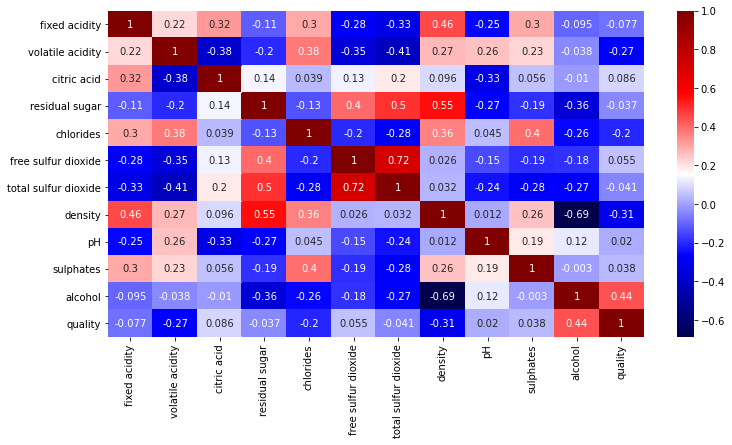

In [16]:
# Correlação com mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(df_vinho.corr(), annot = True, cmap='seismic');

 O 'alcohol' é a variável que possui maior correlação com 'quality'. 'Density' é uma variavel que impacta bem e negativamente a variavel 'alcohol'.


# Regressão Linear

### - Verificando modelo sem outliers

In [335]:
# atribuindo as variaveis

# Variável resposta
y = df_vinho_sem_out['quality']

# Variáveis explicativas
X = df_vinho_sem_out.drop(['quality'], axis=1) 

In [336]:
regressao_linear = LinearRegression()

In [337]:
regressao_linear.fit(X, y)

LinearRegression()

In [338]:
# intercepto
regressao_linear.intercept_

80.19202778037447

In [339]:
# coeficiente angular
regressao_linear.coef_

array([ 8.79402065e-02, -1.33582868e+00, -1.52595254e-01,  5.76359341e-02,
       -3.32504077e-01,  8.02352636e-03, -2.47803670e-03, -8.04646814e+01,
        6.91491786e-01,  8.67661800e-01,  2.47366606e-01])

In [340]:
y_predict = regressao_linear.predict(X)

In [341]:
y_predict

array([4.95081081, 5.6606595 , 4.90263821, ..., 5.3627374 , 6.43746171,
       6.19256798])

In [342]:
r2_score(y, y_predict)

0.27788616980956127

In [343]:
regressao_linear.score(X, y)

0.27788616980956127

In [344]:
# O r2 é baixo, as variaveis nao apresentam correlação forte

* Analise Erro

In [345]:
# Usando statsmodel
x = sm.add_constant(X)

modelo = sm.OLS(y, x).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:24:51   Log-Likelihood:                -5567.4
No. Observations:                5018   AIC:                         1.116e+04
Df Residuals:                    5006   BIC:                         1.124e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   80.1920     18.169      4.414      0.000      44.573     115.811
fixed acidity            0.0879      0.022      4.058      0.000       0.045       0.130
volatile acidity        -1.3358      0.114    -11.678      0.000      -1.560      -1.112
citric acid             -0.1526      0.118     -1.298      0.194      -0.383       0.078
residual sugar           0.0576      0.007      8.048      0.000       0.044       0.072
chlorides               -0.3325      1.026     -0.324      0.746      -2.345       1.680
free sulfur dioxide      0.0080      0.001      8.580      0.000       0.006       0.010
total sulfur dioxide    -0.0025      0.000     -7.711      0.000      -0.003      -0.002
density                -80.4647     18.497     -4.350      0.000    -116.728     -44.202
pH                       0.6915      0.111      6.249      0.000       0.475       0.908
sulphates                0.8677      0.105      8.233      0.000       0.661       1.074
alcohol                  0.2474      0.024     10.503      0.000       0.201       0.294
==============================================================================
Omnibus:                       97.456   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.350
Skew:                           0.100   Prob(JB):                     7.64e-42
Kurtosis:                       3.930   Cond. No.                     3.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### ** O P value de algumas variaveis estão maior que 0,05. 
#### Vamos analisar o erro deste modelo e após, considerar remover estas variaveis e verificar um novo modelo

In [346]:
modelo.resid.mean() # erro proximo a zero

-1.122296622581116e-12

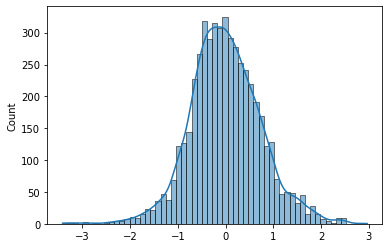

In [29]:
# distribuição do erro, seguindo ditribuição normal
sns.histplot(modelo.resid, kde=True);

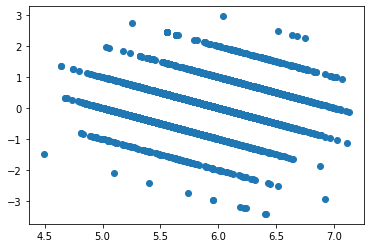

In [30]:
plt.scatter(y_predict, modelo.resid);

### - Retirando variaveis p value acima 0,05

In [347]:
# atribuindo as variaveis

# Variável resposta
y = df_vinho_sem_out['quality']

# Variáveis explicativas removendo as de valores p maior que 0,05
X = df_vinho_sem_out.drop(['quality','citric acid', 'chlorides'], axis=1)

In [348]:
regressao_linear = LinearRegression()
regressao_linear.fit(X, y)

LinearRegression()

In [349]:
print('Intercepto:',regressao_linear.intercept_, '|Coeficientes:', regressao_linear.coef_)

Intercepto: 84.42343134841119 |Coeficientes: [ 8.55007644e-02 -1.29394249e+00  5.90179083e-02  8.00305046e-03
 -2.52010227e-03 -8.47759453e+01  7.08060664e-01  8.62320967e-01
  2.41948525e-01]


In [350]:
y_predict = regressao_linear.predict(X)
y_predict

array([4.9251423 , 5.66960775, 4.89392593, ..., 5.34439015, 6.43862799,
       6.20206442])

In [351]:
regressao_linear.score(X, y)

0.27763120629777993

In [352]:
# Usando statsmodel
x = sm.add_constant(X)

modelo = sm.OLS(y, x).fit()
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     213.9
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:25:21   Log-Likelihood:                -5568.3
No. Observations:                5018   AIC:                         1.116e+04
Df Residuals:                    5008   BIC:                         1.122e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.4234     15.720      5.371      0.000      53.606     115.241
fixed acidity            0.0855      0.021      4.111      0.000       0.045       0.126
volatile acidity        -1.2939      0.107    -12.047      0.000      -1.505      -1.083
residual sugar           0.0590      0.006      9.375      0.000       0.047       0.071
free sulfur dioxide      0.0080      0.001      8.571      0.000       0.006       0.010
total sulfur dioxide    -0.0025      0.000     -7.974      0.000      -0.003      -0.002
density                -84.7759     15.993     -5.301      0.000    -116.129     -53.423
pH                       0.7081      0.108      6.583      0.000       0.497       0.919
sulphates                0.8623      0.105      8.202      0.000       0.656       1.068
alcohol                  0.2419      0.023     10.641      0.000       0.197       0.287
==============================================================================
Omnibus:                       98.813   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.343
Skew:                           0.100   Prob(JB):                     1.04e-42
Kurtosis:                       3.941   Cond. No.                     3.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [353]:
modelo.resid.mean()

4.949493717759278e-13

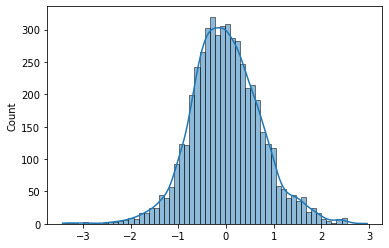

In [354]:
sns.histplot(modelo.resid, kde=True);

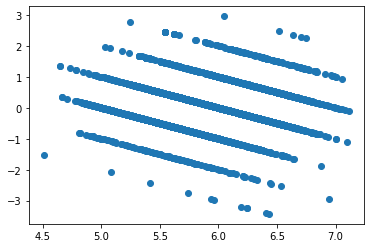

In [355]:
plt.scatter(y_predict, modelo.resid);

Os modelos não apresentaram diferença mesmo removendo variaveis com p value alto. A correlação baixa com 'quality' talvez explique a pouca alteração, e a relação das variaveis com p value baixo com a variaveis removidas

### Vamos analisar se isto acontece com o DF original.

### - Dataset original sem remover outliers

In [356]:

# Variável resposta
y_original = df_vinho['quality']

# Variáveis explicativas
X_original = df_vinho.drop(['quality'], axis=1) 

In [357]:
regressao_linear_original = LinearRegression()

In [358]:
regressao_linear_original.fit(X_original, y_original)

LinearRegression()

In [359]:
regressao_linear_original.intercept_

55.7627496117375

In [360]:
regressao_linear_original.coef_

array([ 6.76839156e-02, -1.32789221e+00, -1.09656648e-01,  4.35587507e-02,
       -4.83713531e-01,  5.96988830e-03, -2.48129841e-03, -5.49669422e+01,
        4.39296072e-01,  7.68251760e-01,  2.67030009e-01])

In [361]:
y_pred_original = regressao_linear_original.predict(X_original)

In [362]:
y_pred_original

array([4.9976074 , 4.92499276, 5.03466303, ..., 5.41936126, 6.43265584,
       6.2057268 ])

In [363]:
r2_score(y_original, y_pred_original)

0.2921368850402045

In [364]:
regressao_linear_original.score(X_original, y_original)

0.2921368850402045

In [365]:
# Usando statsmodel
x = sm.add_constant(X_original)

modelo2 = sm.OLS(y_original, x).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:30:01   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   55.7627     11.894      4.688      0.000      32.447      79.079
fixed acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free sulfur dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total sulfur dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
Com outliers o r score aumentou um pouco, este seria o melhor modelo considerando que o dataset é o original

####  Removendo variaveis P valor maior que 0,05

In [366]:
# Variável resposta
y_original = df_vinho['quality']

# Variáveis explicativas
X_original = df_vinho.drop(['quality', 'citric acid', 'chlorides'], axis=1) 

In [367]:
regressao_linear_p = LinearRegression()

In [368]:
regressao_linear_p.fit(X_original, y_original)
print('Intercepto:', regressao_linear_p.intercept_, '| Coeficientes:', regressao_linear_p.coef_ )

Intercepto: 60.04093497595074 | Coeficientes: [ 6.62089685e-02 -1.30427448e+00  4.53486083e-02  5.93380266e-03
 -2.50297034e-03 -5.94184705e+01  4.78220964e-01  7.37825172e-01
  2.64653153e-01]


In [369]:
y_pred_p = regressao_linear_p.predict(X_original)
y_pred_p

array([4.97594985, 4.90545353, 5.01623728, ..., 5.39468129, 6.43882183,
       6.2146053 ])

In [370]:
regressao_linear_p.score(X_original, y_original)

0.29161851232036673

* Verificando erro

In [371]:
x = sm.add_constant(X_original)

modelo_p = sm.OLS(y_original, x).fit()
modelo_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     296.7
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:31:38   Log-Likelihood:                -7217.8
No. Observations:                6497   AIC:                         1.446e+04
Df Residuals:                    6487   BIC:                         1.452e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   60.0409     11.645      5.156      0.000      37.212      82.870
fixed acidity            0.0662      0.015      4.412      0.000       0.037       0.096
volatile acidity        -1.3043      0.071    -18.445      0.000      -1.443      -1.166
residual sugar           0.0453      0.005      9.024      0.000       0.035       0.055
free sulfur dioxide      0.0059      0.001      7.911      0.000       0.004       0.007
total sulfur dioxide    -0.0025      0.000     -9.217      0.000      -0.003      -0.002
density                -59.4185     11.873     -5.004      0.000     -82.694     -36.143
pH                       0.4782      0.088      5.411      0.000       0.305       0.651
sulphates                0.7378      0.075      9.903      0.000       0.592       0.884
alcohol                  0.2647      0.017     15.886      0.000       0.232       0.297
==============================================================================
Omnibus:                      144.178   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.085
Skew:                          -0.004   Prob(JB):                     2.56e-71
Kurtosis:                       4.096   Cond. No.                     2.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

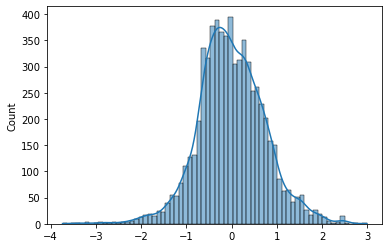

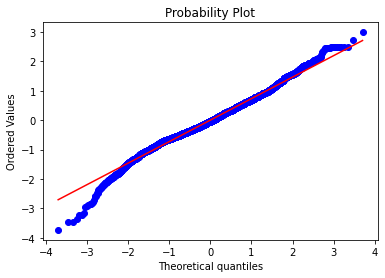

In [84]:
# verificando a distribuição e o quanto está proxima de uam distribuição normal
sns.histplot(modelo_p.resid, kde=True);
plt.show()
stats.probplot(modelo_p.resid, plot=plt);

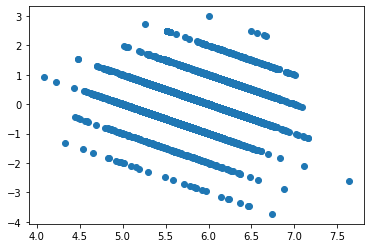

In [85]:
plt.scatter(y_pred_p, modelo_p.resid);

Os outliers não afetou o modelo, pelo menos verificando pelo r score houve pouca alteração (melhora para 29% com outliers em relação a 27% dataset tratado). Assim, acredito que utilizando, o modelo com outliers seria melhor, por considerar todos valores do dataset. E tambem, considerar usar o modelo removido as variaveis preditivas com 'p value' acima de 0,05, ja que alterações nas outras variaveis é que se relacionam com alterações na variavel resposta (y). Considerei realizar uma nova coluna com o alcool ao quadrado, verificando que esta é uma variavel com correlação mais alta mas, o r score diminuiu muito, então nao foi considerado aqui.

## Regressão Logistica

In [316]:
df_vinho2 =df_vinho.copy()
# criando copia do df original para criar coluna conforme quality, acima/igual a 6 como 1 (bom), abaixo disto 0 (Ruim)

In [317]:
df_vinho2['quality 2'] = 0
df_vinho2.loc[df_vinho2['quality']>=6, 'quality 2'] = 1 
df_vinho2.loc[df_vinho2['quality'] < 6, 'quality 2'] = 0

In [318]:
df_vinho2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality 2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [319]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [320]:
X = df_vinho2.drop(['quality', 'quality 2'], axis=1)
Y = df_vinho2['quality 2']

In [321]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

modelo = LogisticRegression()

#Treinando o modelo 
modelo.fit(X_train, y_train)

#Previsões
y_pred = modelo.predict(X_test)
y_pred

C:\Users\Pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [322]:
# matriz de confusão
matriz = metrics.confusion_matrix(y_test,y_pred)

matriz

array([[236, 232],
       [111, 721]], dtype=int64)

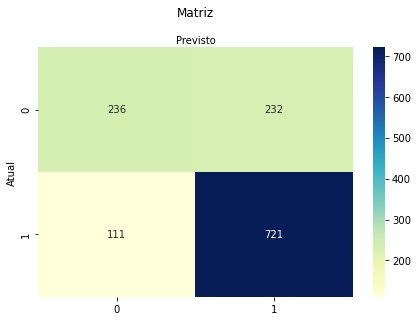

In [324]:
fig, ax = plt.subplots()
tick_marks = np.arange(2)
plt.xticks(tick_marks)
plt.yticks(tick_marks)
# create heatmap
sns.heatmap(pd.DataFrame(matriz), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz', y=1.1)
plt.ylabel('Atual')
plt.xlabel('Previsto')

plt.show()

In [325]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7361538461538462
Precision: 0.7565582371458552
Recall: 0.8665865384615384


Este modelo apresentou boas métricas, vamos analisar com DF sem outliers

### Modelo sem outliers

In [326]:
df_vinho3 = df_vinho_sem_out.copy()

In [327]:
df_vinho3['quality 2'] = 0
df_vinho3.loc[df_vinho3['quality']>=6, 'quality 2'] = 1 
df_vinho3.loc[df_vinho3['quality'] < 6, 'quality 2'] = 0

In [328]:
X = df_vinho3.drop(['quality', 'quality 2'], axis=1)
Y = df_vinho3['quality 2']

In [329]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

modelo = LogisticRegression()

#Treinando o modelo 
modelo.fit(X_train, y_train)

#Previsões
y_pred = modelo.predict(X_test)
y_pred

C:\Users\Pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [330]:
matriz_2 = metrics.confusion_matrix(y_test,y_pred)

matriz_2

array([[167, 146],
       [ 92, 599]], dtype=int64)

In [331]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7629482071713147
Precision: 0.8040268456375839
Recall: 0.8668596237337193


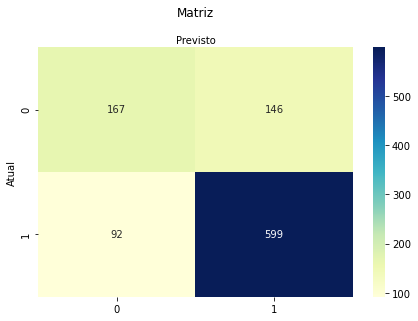

In [334]:
fig, ax = plt.subplots()
tick_marks = np.arange(2)
plt.xticks(tick_marks)
plt.yticks(tick_marks)
# create heatmap
sns.heatmap(pd.DataFrame(matriz_2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz', y=1.1)
plt.ylabel('Atual')
plt.xlabel('Previsto')

plt.show()

Este modelo se apresentou melhor, a metrica recall se manteve mas, a precisão e acurácia aumentou.